### Code Notebook for Stat 165 Final Project- Olympics Medal Count

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

import pandas as pd

#### Load in Olympics Data Frame and View Properties

In [2]:
df = pd.read_csv("olympic_results.csv")

In [3]:
df.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [4]:
#Column titles
df.columns

Index(['discipline_title', 'event_title', 'slug_game', 'participant_type',
       'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_url',
       'athlete_full_name', 'value_unit', 'value_type'],
      dtype='object')

In [5]:
#Events
df["discipline_title"].unique()

array(['Curling', 'Freestyle Skiing', 'Short Track Speed Skating',
       'Snowboard', 'Ski Jumping', 'Figure skating', 'Luge', 'Ice Hockey',
       'Biathlon', 'Alpine Skiing', 'Skeleton', 'Cross Country Skiing',
       'Speed skating', 'Nordic Combined', 'Bobsleigh', 'Shooting',
       'Diving', 'Canoe Sprint', 'Cycling Road', 'Football', 'Boxing',
       'Artistic Swimming', 'Handball', 'Rugby Sevens',
       'Cycling BMX Racing', 'Triathlon', 'Surfing', 'Table Tennis',
       'Canoe Slalom', 'Marathon Swimming', 'Trampoline Gymnastics',
       'Volleyball', 'Basketball', 'Taekwondo', 'Cycling Track',
       'Fencing', 'Badminton', 'Water Polo', 'Sport Climbing',
       'Wrestling', 'Tennis', 'Artistic Gymnastics', 'Golf',
       'Cycling BMX Freestyle', 'Judo', 'Skateboarding', 'Archery',
       'Weightlifting', 'Baseball/Softball', 'Equestrian',
       'Modern Pentathlon', 'Athletics', 'Swimming', 'Sailing',
       'Cycling Mountain Bike', 'Rowing', 'Karate', '3x3 Basketball',
   

#### Initial Analysis (run, but SKIP TO FINAL COMPUTATION to view relevant code)

In [6]:
df_GA = df[df['discipline_title'] == "Gymnastics Artistic"]
#df_GA.head()

In [7]:
df_GA[df_GA['event_title'].str.contains("team competition")]

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
17915,Gymnastics Artistic,team competition men,rio-2016,GameTeam,GOLD,NaN,NaN,1,Japan,JP,JPN,NaN,NaN,274.094,POINTS
17916,Gymnastics Artistic,team competition men,rio-2016,GameTeam,SILVER,NaN,NaN,2,Russian Federation,RU,RUS,NaN,NaN,271.453,POINTS
17917,Gymnastics Artistic,team competition men,rio-2016,GameTeam,BRONZE,NaN,NaN,3,People's Republic of China,CN,CHN,NaN,NaN,271.122,POINTS
17918,Gymnastics Artistic,team competition men,rio-2016,GameTeam,NaN,NaN,NaN,4,Great Britain,GB,GBR,NaN,NaN,269.752,POINTS
17919,Gymnastics Artistic,team competition men,rio-2016,GameTeam,NaN,NaN,NaN,5,United States of America,US,USA,NaN,NaN,268.560,POINTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159139,Gymnastics Artistic,team competition men,london-1908,GameTeam,NaN,NaN,NaN,4,Denmark,DK,DEN,NaN,NaN,378,POINTS
159140,Gymnastics Artistic,team competition men,london-1908,GameTeam,NaN,NaN,NaN,5,France,FR,FRA,NaN,NaN,319,POINTS
159141,Gymnastics Artistic,team competition men,london-1908,GameTeam,NaN,NaN,NaN,6,Italy,IT,ITA,NaN,NaN,316,POINTS
159142,Gymnastics Artistic,team competition men,london-1908,GameTeam,NaN,NaN,NaN,7,Netherlands,NL,NED,NaN,NaN,297,POINTS


In [8]:
df_TGA = df_GA[df_GA['event_title'].str.contains("team competition")]
#df_TGA.head()

In [9]:
TGA_podium = df_TGA.dropna(subset = "medal_type")

In [10]:
TGA_podium["country_name"].unique()

array(['Japan', 'Russian Federation', "People's Republic of China",
       'United States of America', 'Romania', 'Great Britain', 'Ukraine',
       'Unified Team', 'Soviet Union',
       'German Democratic Republic (Germany)', 'Hungary',
       'Czechoslovakia', 'Finland', 'Switzerland', 'Germany', 'Italy',
       'Yugoslavia', 'Netherlands', 'France', 'Belgium', 'Sweden',
       'Norway'], dtype=object)

In [11]:
TGA_podium["country_3_letter_code"].unique()

array(['JPN', 'RUS', 'CHN', 'USA', 'ROU', 'GBR', 'UKR', 'EUN', 'URS',
       'GDR', 'HUN', 'TCH', 'FIN', 'SUI', 'GER', 'ITA', 'YUG', 'NED',
       'FRA', 'BEL', 'SWE', 'NOR'], dtype=object)

In [12]:
# "year", "GA_medal_type", "country_name", "gold_num", "silver_num", "bronze_num", "total_unweighted", "total_weighted"

df_final = TGA_podium[["event_title", "slug_game", "country_name", "medal_type", "rank_position"]]
df_final.head()

,event_title,slug_game,country_name,medal_type,rank_position
17915,team competition men,rio-2016,Japan,GOLD,1
17916,team competition men,rio-2016,Russian Federation,SILVER,2
17917,team competition men,rio-2016,People's Republic of China,BRONZE,3
18020,team competition women,rio-2016,United States of America,GOLD,1
18021,team competition women,rio-2016,Russian Federation,SILVER,2


In [13]:
df_test = pd.merge(df, df_final, on = ["slug_game", "country_name"], how = "inner")
# df_test.head()

In [14]:
df_test_n = df_test.dropna(subset = "medal_type_x")

In [15]:
df_test_n2 = df_test_n[["slug_game", "medal_type_x", "rank_position_x", "country_name", "country_3_letter_code", "event_title_y"]].groupby(by = ["slug_game", "country_name", "country_3_letter_code", "event_title_y"]).agg("count")

In [16]:
dist_df = df_test_n2.reset_index(level=[0,1])
#dist_df.head()

In [17]:
dist_df['year'] = dist_df["slug_game"].str[-4:].astype(int)

In [18]:
dist_df2 = dist_df.reset_index(level=[0,1])
#dist_df2.head()

In [19]:
dist_df2.sort_values(by = "year", ascending = True)

,country_3_letter_code,event_title_y,slug_game,country_name,medal_type_x,rank_position_x,year
45,FIN,team competition men,london-1908,Finland,5,5,1908
46,NOR,team competition men,london-1908,Norway,8,8,1908
47,SWE,team competition men,london-1908,Sweden,25,25,1908
108,GBR,team competition men,stockholm-1912,Great Britain,39,39,1912
110,ITA,team competition men,stockholm-1912,Italy,6,6,1912
...,...,...,...,...,...,...,...
93,JPN,team competition men,rio-2016,Japan,41,41,2016
94,CHN,team competition men,rio-2016,People's Republic of China,70,70,2016
95,CHN,team competition women,rio-2016,People's Republic of China,70,70,2016
96,RUS,team competition men,rio-2016,Russian Federation,56,56,2016


# Questions so far:



Countries that change name over time.

women's artistic gymnastic was not introduced until 1928

Since we are looking at both men and women's performance in the match, the number of countries we are looking at will differ from time to time: from 3 to 6



In [20]:
df_finalll = dist_df2.sort_values(by = "year", ascending = True)
#df_finalll

In [21]:
# In order to predict the total medal number, we first identify the distribution type, then find the variacne, mean, and then use this to make forcast.

In [22]:
# sns.histplot(data=df_finalll, x="medal_type_x")

In [23]:
# Skewed right, so maybe exponential distribution?

In [24]:
df_test_n3 = df_test_n[["slug_game", "medal_type_x", "rank_position_x", "country_name", "country_3_letter_code"]].groupby(by = ["slug_game", "country_name", "country_3_letter_code"]).agg("count")

In [25]:
df_test_n3

medal_type_x  \
slug_game      country_name             country_3_letter_code                 
amsterdam-1928 Czechoslovakia           TCH                               9   
               Great Britain            GBR                              20   
               Italy                    ITA                              19   
               Netherlands              NED                              19   
               Switzerland              SUI                              15   
...                                                                     ...   
sydney-2000    Ukraine                  UKR                              23   
               United States of America USA                              93   
tokyo-1964     Czechoslovakia           TCH                              14   
               Japan                    JPN                              29   
               Soviet Union             URS                              96   

                                                               rank_position_x  
slug_game      country_name             country_3_letter_code                   
amsterdam-1928 Czechoslovakia           TCH                                  9  
               Great Britain            GBR                                 20  
               Italy                    ITA                                 19  
               Netherlands              NED                                 19  
               Switzerland              SUI                                 15  
...                                                                        ...  
sydney-2000    Ukraine                  UKR                                 23  
               United States of America USA                                 93  
tokyo-1964     Czechoslovakia           TCH                                 14  
               Japan                    JPN                                 29  
               Soviet Union             URS                                 96  

[101 rows x 2 columns]

In [26]:
dist_df3 = df_test_n3.reset_index(level=[0,1])
#dist_df3.head()

In [27]:
dist_df3['year'] = dist_df3["slug_game"].str[-4:].astype(int)

In [28]:
dist_df4 = dist_df3.reset_index(level=[0])
#dist_df4.head()

In [29]:
df_3 = dist_df4.sort_values(by = "year", ascending = True)
#df_3.head()

In [30]:
# sns.histplot(data=df_3[df_3["year"]>1950], x="medal_type_x")

In [31]:
df_4 = df_3[df_3["year"]>1950]

In [32]:
#df_4["medal_type_x"].max()

In [33]:
#df_4["medal_type_x"].min()

In [34]:
mean_ = df_4["medal_type_x"].mean()
var_ = df_4["medal_type_x"].var()

lambda_ = 1 / mean_

In [35]:
# data = {'medal_type_x': np.random.exponential(scale=2, size=1000)}  # scale = 1/lambda
# df_3 = pd.DataFrame(data)

# Calculate lambda from data
lambda_estimated = 1 / df_3['medal_type_x'].mean()

# Create histogram
# sns.histplot(data=df_3, x="medal_type_x", kde=False, stat="density", bins=30, color='blue', label='Histogram')

# Compute and plot PDF
# x = np.linspace(0, df_3['medal_type_x'].max(), 100)
# pdf = lambda_estimated * np.exp(-lambda_estimated * x)
# plt.plot(x, pdf, 'r-', label='Estimated Exponential PDF')

# Add labels and legend
# plt.title('Histogram and Exponential PDF raw medal count')
# plt.xlabel('Total Medal Number in one Game')
# plt.ylabel('Density')
# plt.legend()

# Show plot
# plt.show()

## 95% CI for the total number of medals for countries that podium in artistic gymnastics

In [36]:
# sample_mean = df_3['medal_type_x'].mean()

# lambda_estimated = 1 / df_3['medal_type_x'].mean()

# Calculate the sample mean and estimate lambda
sample_mean = df_3['medal_type_x'].mean()
lambda_est = 1 / sample_mean

# Calculate the 2.5th and 97.5th percentiles for the exponential distribution
q_low = np.log(1 - 0.025) / -lambda_est  # 2.5th percentile
q_high = np.log(1 - 0.975) / -lambda_est  # 97.5th percentile

#print(f"95% Confidence Interval for an observation: ({q_low:.4f}, {q_high:.4f})")

In [37]:
df_3 = df_3.reset_index()
df_3.head()

,index,country_3_letter_code,slug_game,country_name,medal_type_x,rank_position_x,year
0,37,FIN,london-1908,Finland,5,5,1908
1,38,NOR,london-1908,Norway,8,8,1908
2,39,SWE,london-1908,Sweden,25,25,1908
3,90,GBR,stockholm-1912,Great Britain,39,39,1912
4,92,ITA,stockholm-1912,Italy,6,6,1912


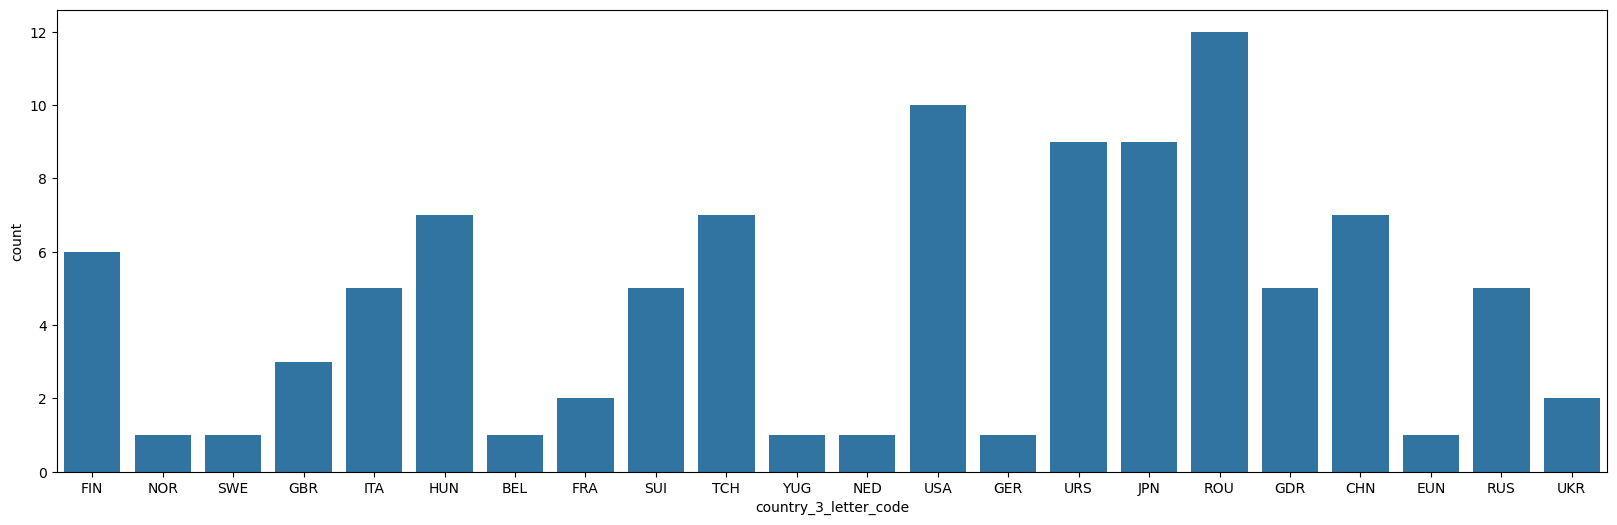

In [38]:
# @title
plt.figure(figsize=(20, 6))  # Width, height in inches

sns.countplot(data=df_3, x="country_3_letter_code")

plt.show()

### FINAL COMPUTATION: Switch to percentage of medals

In [39]:
df_temp1 = df.copy()
df_temp1.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [40]:
df_temp2 = df_temp1.dropna(subset = ["medal_type"])

In [41]:
df_temp2.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
10,Curling,Women,beijing-2022,GameTeam,GOLD,NaN,False,1,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
11,Curling,Women,beijing-2022,GameTeam,SILVER,NaN,False,2,Japan,JP,JPN,NaN,NaN,NaN,NaN


In [42]:
df_temp2['year'] = df_temp2["slug_game"].str[-4:].astype(int)

/tmp/ipykernel_140/3219571527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['year'] = df_temp2["slug_game"].str[-4:].astype(int)


In [43]:
df_temp2.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN,2022
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN,2022
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN,2022
10,Curling,Women,beijing-2022,GameTeam,GOLD,NaN,False,1,Great Britain,GB,GBR,NaN,NaN,NaN,NaN,2022
11,Curling,Women,beijing-2022,GameTeam,SILVER,NaN,False,2,Japan,JP,JPN,NaN,NaN,NaN,NaN,2022


In [44]:
df_temp3 = df_temp2[["year", "slug_game",  "medal_type"]].groupby(by = ["slug_game", "year"]).agg("count")

In [45]:
df_temp4 = df_temp3.reset_index()

In [46]:
df_temp4.head()

,slug_game,year,medal_type
0,albertville-1992,1992,171
1,amsterdam-1928,1928,323
2,antwerp-1920,1920,438
3,athens-1896,1896,122
4,athens-2004,2004,926


In [47]:
df_temp4 = df_temp4.rename(columns = {"medal_type":"medal_count"})

In [48]:
df_temp4.head()

,slug_game,year,medal_count
0,albertville-1992,1992,171
1,amsterdam-1928,1928,323
2,antwerp-1920,1920,438
3,athens-1896,1896,122
4,athens-2004,2004,926


In [49]:
df_3["country_name"].unique()

array(['Finland', 'Norway', 'Sweden', 'Great Britain', 'Italy', 'Hungary',
       'Belgium', 'France', 'Switzerland', 'Czechoslovakia', 'Yugoslavia',
       'Netherlands', 'United States of America', 'Germany',
       'Soviet Union', 'Japan', 'Romania',
       'German Democratic Republic (Germany)',
       "People's Republic of China", 'Unified Team', 'Russian Federation',
       'Ukraine'], dtype=object)

In [50]:
df_3["country_3_letter_code"].unique()

array(['FIN', 'NOR', 'SWE', 'GBR', 'ITA', 'HUN', 'BEL', 'FRA', 'SUI',
       'TCH', 'YUG', 'NED', 'USA', 'GER', 'URS', 'JPN', 'ROU', 'GDR',
       'CHN', 'EUN', 'RUS', 'UKR'], dtype=object)

In [51]:
df_3.head()

,index,country_3_letter_code,slug_game,country_name,medal_type_x,rank_position_x,year
0,37,FIN,london-1908,Finland,5,5,1908
1,38,NOR,london-1908,Norway,8,8,1908
2,39,SWE,london-1908,Sweden,25,25,1908
3,90,GBR,stockholm-1912,Great Britain,39,39,1912
4,92,ITA,stockholm-1912,Italy,6,6,1912


In [52]:
df_temp5 = pd.merge(df_3, df_temp4, on = ["year"], how = "inner")
df_temp5.head()

,index,country_3_letter_code,slug_game_x,country_name,medal_type_x,rank_position_x,year,slug_game_y,medal_count
0,37,FIN,london-1908,Finland,5,5,1908,london-1908,324
1,38,NOR,london-1908,Norway,8,8,1908,london-1908,324
2,39,SWE,london-1908,Sweden,25,25,1908,london-1908,324
3,90,GBR,stockholm-1912,Great Britain,39,39,1912,stockholm-1912,312
4,92,ITA,stockholm-1912,Italy,6,6,1912,stockholm-1912,312


In [53]:
df_temp5["medal_percentage"] = df_temp5["medal_type_x"] / df_temp5["medal_count"]

In [54]:
df_temp5

,index,country_3_letter_code,slug_game_x,country_name,medal_type_x,rank_position_x,year,slug_game_y,medal_count,medal_percentage
0,37,FIN,london-1908,Finland,5,5,1908,london-1908,324,0.015432
1,38,NOR,london-1908,Norway,8,8,1908,london-1908,324,0.024691
2,39,SWE,london-1908,Sweden,25,25,1908,london-1908,324,0.077160
3,90,GBR,stockholm-1912,Great Britain,39,39,1912,stockholm-1912,312,0.125000
4,92,ITA,stockholm-1912,Italy,6,6,1912,stockholm-1912,312,0.019231
...,...,...,...,...,...,...,...,...,...,...
160,50,USA,london-2012,United States of America,104,104,2012,london-2012,955,0.108901
161,81,RUS,rio-2016,Russian Federation,112,112,2016,rio-2016,973,0.115108
162,80,CHN,rio-2016,People's Republic of China,140,140,2016,rio-2016,973,0.143885
163,79,JPN,rio-2016,Japan,41,41,2016,rio-2016,973,0.042138


<Axes: xlabel='medal_percentage', ylabel='Count'>

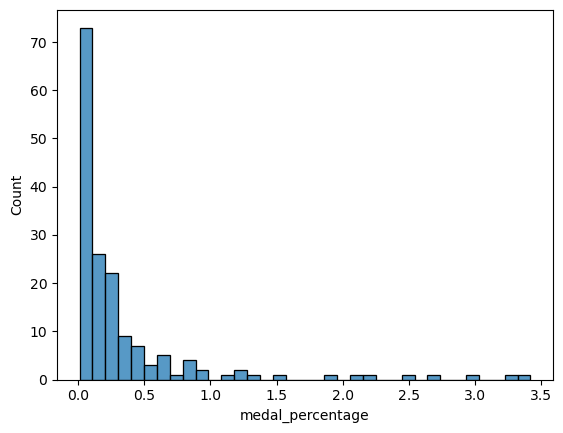

In [55]:
sns.histplot(data=df_temp5, x="medal_percentage")

In [56]:
mean_2 = df_temp5["medal_percentage"].mean()
var_2 = df_temp5["medal_percentage"].var()

lambda_2 = 1 / mean_2

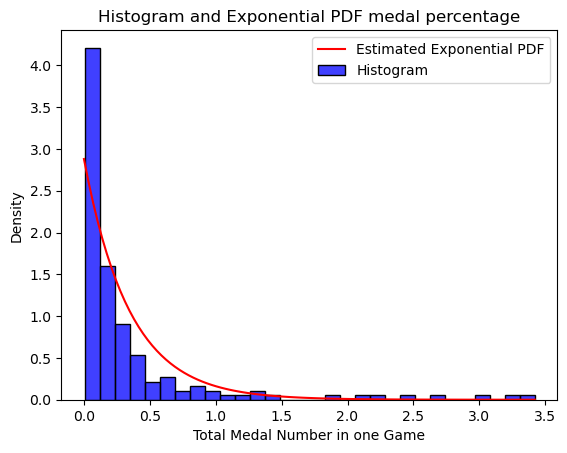

In [57]:
# data = {'medal_type_x': np.random.exponential(scale=2, size=1000)}  # scale = 1/lambda
# df_3 = pd.DataFrame(data)

# Calculate lambda from data
lambda_estimated2 = 1 / df_temp5["medal_percentage"].mean()

# Create histogram
sns.histplot(data=df_temp5, x="medal_percentage", kde=False, stat="density", bins=30, color='blue', label='Histogram')

# Compute and plot PDF
x2 = np.linspace(0, df_temp5['medal_percentage'].max(), 100)
pdf = lambda_estimated2 * np.exp(-lambda_estimated2 * x2)
plt.plot(x2, pdf, 'r-', label='Estimated Exponential PDF')

# Add labels and legend
plt.title('Histogram and Exponential PDF medal percentage')
plt.xlabel('Total Medal Number in one Game')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

In [58]:
# Calculate the sample mean and estimate lambda
sample_mean = df_temp5['medal_percentage'].mean()
lambda_est = 1 / sample_mean

# Calculate the 2.5th and 97.5th percentiles for the exponential distribution
q_low = np.log(1 - 0.025) / -lambda_est  # 2.5th percentile
q_high = np.log(1 - 0.975) / -lambda_est  # 97.5th percentile

print(f"95% Confidence Interval for an observation: ({q_low:.4f}, {q_high:.4f})")

95% Confidence Interval for an observation: (0.0088, 1.2813)


#### Simulating the 80% Confidence Interval for Each Country Projected to Participate in the Artistic Gymnastics Olympic Team Event

In [59]:
#Select USA
df_USA = df_temp2[df_temp2["country_3_letter_code"] == "USA"]
df_USA.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year
66,Freestyle Skiing,Men's Freeski Halfpipe,beijing-2022,Athlete,SILVER,NaN,False,2,United States of America,US,USA,https://olympics.com/en/athletes/david-wise,David WISE,88.75,POINTS,2022
71,Freestyle Skiing,Men's Freeski Halfpipe,beijing-2022,Athlete,BRONZE,NaN,False,3,United States of America,US,USA,https://olympics.com/en/athletes/alex-ferreira,Alex FERREIRA,84.25,POINTS,2022
103,Freestyle Skiing,Men's Freeski Big Air,beijing-2022,Athlete,SILVER,NaN,False,2,United States of America,US,USA,https://olympics.com/en/athletes/colby-stevenson,Colby STEVENSON,56.00,POINTS,2022
192,Freestyle Skiing,Women's Moguls,beijing-2022,Athlete,SILVER,NaN,False,2,United States of America,US,USA,https://olympics.com/en/athletes/kauf,Jaelin KAUF,79.15,POINTS,2022
202,Freestyle Skiing,Mixed Team Aerials,beijing-2022,GameTeam,GOLD,NaN,False,1,United States of America,US,USA,NaN,NaN,NaN,CODE,2022


In [60]:
#Extract the year from the Games Column
df_USA['year'] = df_USA["slug_game"].str[-4:].astype(int)
#df_USA.head()

/tmp/ipykernel_140/2876032393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA['year'] = df_USA["slug_game"].str[-4:].astype(int)


In [61]:
df_USA_S = df_USA[df_USA["year"] % 4 == 0]

In [62]:
#Group by year, country, and count
df_USA_S = df_USA_S[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_USA_S_1 = df_USA_S.reset_index()
# df_USA_S_1

In [63]:
df_USA_S_2 = pd.merge(df_USA_S_1, df_temp4, on = ["slug_game", "year"], how = "inner")
# df_USA_S_2

In [64]:
df_USA_S_2["percentage"] = df_USA_S_2["medal_type"] / df_USA_S_2["medal_count"]

In [65]:
# df_USA_S_2.sort_values(by = "year")

In [66]:
#We are only looking at Summer Olympics, drop all Winter Olympic games
cities_to_drop = ["chamonix-1924", "st-moritz-1928", "lake-placid-1932", "garmisch-partenkirchen-1936", "st-moritz-1948", "oslo-1952", "cortina-d-ampezzo-1956", "squaw-valley-1960", "innsbruck-1964", "grenoble-1968", "sapporo-1972", "innsbruck-1976", "lake-placid-1980", "sarajevo-1984", "calgary-1988", "albertville-1992"]

In [67]:
cities_to_drop = ["chamonix-1924", "st-moritz-1928", "lake-placid-1932", "garmisch-partenkirchen-1936", "st-moritz-1948", "oslo-1952", "cortina-d-ampezzo-1956", "squaw-valley-1960", "innsbruck-1964", "grenoble-1968", "sapporo-1972", "innsbruck-1976", "lake-placid-1980", "sarajevo-1984", "calgary-1988", "albertville-1992"]
df_USA_S_2 = df_USA_S_2[~df_USA_S_2['slug_game'].isin(cities_to_drop)]

In [68]:
df_USA = df_USA_S_2.sort_values(by = "year")

<Axes: xlabel='year', ylabel='medal_count'>

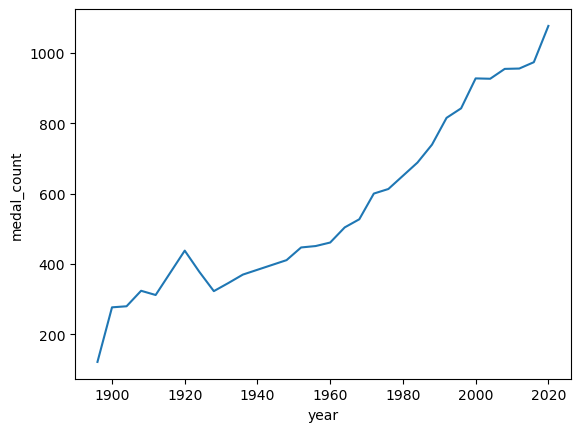

In [69]:
#Plot Medal Count versus Year
sns.lineplot(data=df_USA, x="year", y = "medal_count")

In [70]:
# df_temp6 = pd.merge(df_USA, df_temp4, on = ["slug_game"], how = "inner")
# df_temp6.head()

In [71]:
#instead of total medal count, we want percentage of medals won by USA IN THAT YEAR
df_USA = df_temp2[df_temp2["country_3_letter_code"] == "USA"]
df_USA['year'] = df_USA["slug_game"].str[-4:].astype(int)
df_USA = df_USA[df_USA["year"] % 4 == 0]
df_USA = df_USA[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_USA = df_USA.reset_index()
df_USA = pd.merge(df_USA, df_temp4, on = ["slug_game", "year"], how = "inner")
df_USA["percentage"] = df_USA["medal_type"] / df_USA["medal_count"]
df_USA = df_USA[~df_USA['slug_game'].isin(cities_to_drop)]
df_USA = df_USA.sort_values(by = "year")
df_USA.head()

/tmp/ipykernel_140/131088999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA['year'] = df_USA["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
3,athens-1896,USA,1896,20,122,0.163934
29,paris-1900,USA,1900,48,277,0.173285
37,st-louis-1904,USA,1904,231,280,0.825000
19,london-1908,USA,1908,47,324,0.145062
40,stockholm-1912,USA,1912,63,312,0.201923


Text(0.5, 1.0, 'USA Medal Percentage')

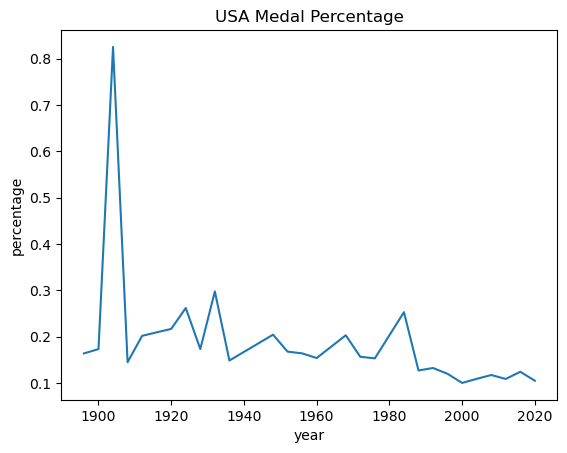

In [72]:
#Plot as a percentage of total medal count THAT year
sns.lineplot(data=df_USA, x="year", y = "percentage")
plt.title("USA Medal Percentage")

In [73]:
df_GBR = df_temp2[df_temp2["country_3_letter_code"] == "GBR"]
df_GBR['year'] = df_GBR["slug_game"].str[-4:].astype(int)
df_GBR = df_GBR[df_GBR["year"] % 4 == 0]
df_GBR = df_GBR[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_GBR = df_GBR.reset_index()
df_GBR = pd.merge(df_GBR, df_temp4, on = ["slug_game", "year"], how = "inner")
df_GBR["percentage"] = df_GBR["medal_type"] / df_GBR["medal_count"]
df_GBR = df_GBR[~df_GBR['slug_game'].isin(cities_to_drop)]
df_GBR = df_GBR.sort_values(by = "year")
df_GBR.head()

/tmp/ipykernel_140/300237533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GBR['year'] = df_GBR["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
2,athens-1896,GBR,1896,7,122,0.057377
25,paris-1900,GBR,1900,32,277,0.115523
31,st-louis-1904,GBR,1904,2,280,0.007143
14,london-1908,GBR,1908,146,324,0.450617
34,stockholm-1912,GBR,1912,39,312,0.125000


Text(0.5, 1.0, 'Britian Medal Percentage')

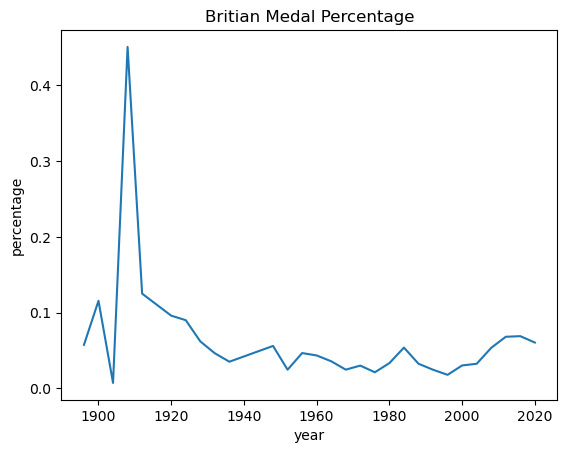

In [74]:
sns.lineplot(data=df_GBR, x="year", y = "percentage")
plt.title("Britian Medal Percentage")

In [75]:
df_CHN = df_temp2[df_temp2["country_3_letter_code"] == "CHN"]
df_CHN['year'] = df_CHN["slug_game"].str[-4:].astype(int)
df_CHN = df_CHN[df_CHN["year"] % 4 == 0]
df_CHN = df_CHN[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_CHN = df_CHN.reset_index()
df_CHN = pd.merge(df_CHN, df_temp4, on = ["slug_game", "year"], how = "inner")
df_CHN["percentage"] = df_CHN["medal_type"] / df_CHN["medal_count"]
df_CHN = df_CHN[~df_CHN['slug_game'].isin(cities_to_drop)]
df_CHN = df_CHN.sort_values(by = "year")
df_CHN.head()

/tmp/ipykernel_140/998781804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CHN['year'] = df_CHN["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
6,los-angeles-1984,CHN,1984,32,688,0.046512
8,seoul-1988,CHN,1988,28,739,0.037889
3,barcelona-1992,CHN,1992,54,815,0.066258
2,atlanta-1996,CHN,1996,50,842,0.059382
9,sydney-2000,CHN,2000,58,927,0.062567


Text(0.5, 1.0, 'China (PRC) Medal Percentage')

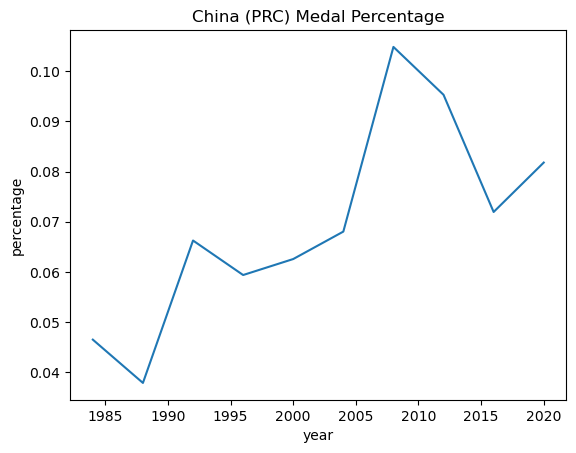

In [76]:
sns.lineplot(data=df_CHN, x="year", y = "percentage")
plt.title("China (PRC) Medal Percentage")

In [77]:
df_JPN = df_temp2[df_temp2["country_3_letter_code"] == "JPN"]
df_JPN['year'] = df_JPN["slug_game"].str[-4:].astype(int)
df_JPN = df_JPN[df_JPN["year"] % 4 == 0]
df_JPN = df_JPN[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_JPN = df_JPN.reset_index()
df_JPN = pd.merge(df_JPN, df_temp4, on = ["slug_game", "year"], how = "inner")
df_JPN["percentage"] = df_JPN["medal_type"] / df_JPN["medal_count"]
df_JPN = df_JPN[~df_JPN['slug_game'].isin(cities_to_drop)]
df_JPN = df_JPN.sort_values(by = "year")
df_JPN.head()

/tmp/ipykernel_140/2252798379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JPN['year'] = df_JPN["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
2,antwerp-1920,JPN,1920,2,438,0.004566
19,paris-1924,JPN,1924,1,378,0.002646
1,amsterdam-1928,JPN,1928,5,323,0.015480
13,los-angeles-1932,JPN,1932,18,346,0.052023
7,berlin-1936,JPN,1936,18,370,0.048649


Text(0.5, 1.0, 'Japan Medal Percentage')

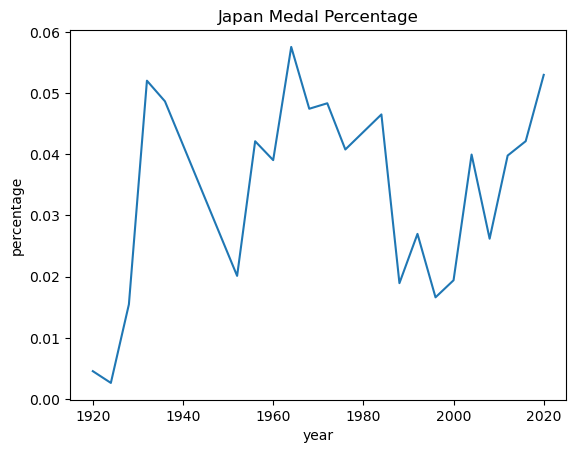

In [78]:
sns.lineplot(data=df_JPN, x="year", y = "percentage")
plt.title("Japan Medal Percentage")

In [79]:
df_ITA = df_temp2[df_temp2["country_3_letter_code"] == "ITA"]
df_ITA['year'] = df_ITA["slug_game"].str[-4:].astype(int)
df_ITA = df_ITA[df_ITA["year"] % 4 == 0]
df_ITA = df_ITA[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_ITA = df_ITA.reset_index()
df_ITA = pd.merge(df_ITA, df_temp4, on = ["slug_game", "year"], how = "inner")
df_ITA["percentage"] = df_ITA["medal_type"] / df_ITA["medal_count"]
df_ITA = df_ITA[~df_ITA['slug_game'].isin(cities_to_drop)]
df_ITA = df_ITA.sort_values(by = "year")
df_ITA.head()

/tmp/ipykernel_140/1044693157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ITA['year'] = df_ITA["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
26,paris-1900,ITA,1900,4,277,0.014440
15,london-1908,ITA,1908,4,324,0.012346
35,stockholm-1912,ITA,1912,6,312,0.019231
2,antwerp-1920,ITA,1920,23,438,0.052511
27,paris-1924,ITA,1924,16,378,0.042328


Text(0.5, 1.0, 'Italy Medal Percentage')

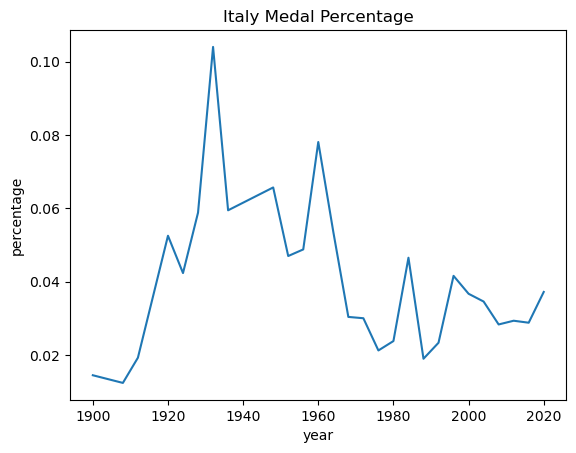

In [80]:
sns.lineplot(data=df_ITA, x="year", y = "percentage")
plt.title("Italy Medal Percentage")

In [81]:
df_FRA = df_temp2[df_temp2["country_3_letter_code"] == "FRA"]
df_FRA['year'] = df_FRA["slug_game"].str[-4:].astype(int)
df_FRA = df_FRA[df_FRA["year"] % 4 == 0]
df_FRA = df_FRA[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_FRA = df_FRA.reset_index()
df_FRA = pd.merge(df_FRA, df_temp4, on = ["slug_game", "year"], how = "inner")
df_FRA["percentage"] = df_FRA["medal_type"] / df_FRA["medal_count"]
df_FRA = df_FRA[~df_FRA['slug_game'].isin(cities_to_drop)]
df_FRA = df_FRA.sort_values(by = "year")
df_FRA.head()

/tmp/ipykernel_140/4144937967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FRA['year'] = df_FRA["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
3,athens-1896,FRA,1896,11,122,0.090164
29,paris-1900,FRA,1900,97,277,0.350181
37,st-louis-1904,FRA,1904,1,280,0.003571
18,london-1908,FRA,1908,19,324,0.058642
40,stockholm-1912,FRA,1912,14,312,0.044872


Text(0.5, 1.0, 'France Medal Percentage')

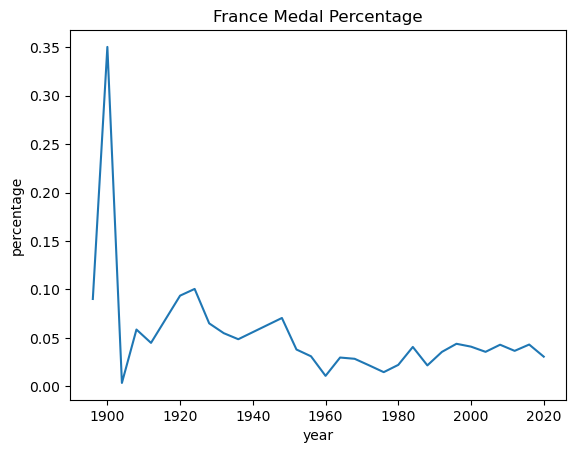

In [82]:
sns.lineplot(data=df_FRA, x="year", y = "percentage")
plt.title("France Medal Percentage")

In [83]:
df_BRA = df_temp2[df_temp2["country_3_letter_code"] == "BRA"]
df_BRA['year'] = df_BRA["slug_game"].str[-4:].astype(int)
df_BRA = df_BRA[df_BRA["year"] % 4 == 0]
df_BRA = df_BRA[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_BRA = df_BRA.reset_index()
df_BRA = pd.merge(df_BRA, df_temp4, on = ["slug_game", "year"], how = "inner")
df_BRA["percentage"] = df_BRA["medal_type"] / df_BRA["medal_count"]
df_BRA = df_BRA[~df_BRA['slug_game'].isin(cities_to_drop)]
df_BRA = df_BRA.sort_values(by = "year")
df_BRA.head()

/tmp/ipykernel_140/1377647896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BRA['year'] = df_BRA["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
0,antwerp-1920,BRA,1920,3,438,0.006849
6,london-1948,BRA,1948,1,411,0.002433
5,helsinki-1952,BRA,1952,3,447,0.006711
9,melbourne-1956,BRA,1956,1,451,0.002217
15,rome-1960,BRA,1960,2,461,0.004338


Text(0.5, 1.0, 'Brazil Medal Percentage')

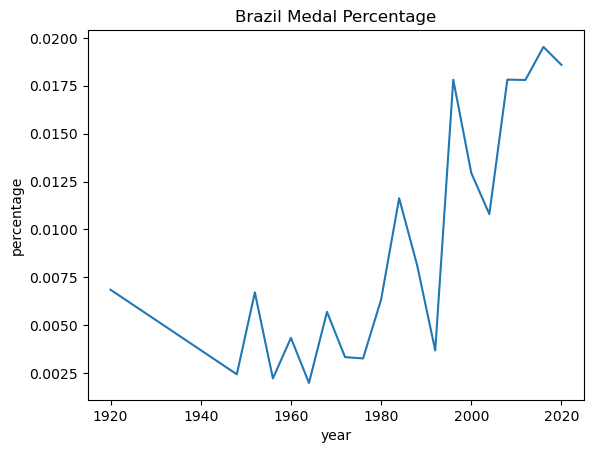

In [84]:
sns.lineplot(data=df_BRA, x="year", y = "percentage")
plt.title("Brazil Medal Percentage")

In [85]:
df_UKR= df_temp2[df_temp2["country_3_letter_code"] == "UKR"]
df_UKR['year'] = df_UKR["slug_game"].str[-4:].astype(int)
df_UKR = df_UKR[df_UKR["year"] % 4 == 0]
df_UKR = df_UKR[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_UKR = df_UKR.reset_index()
df_UKR = pd.merge(df_UKR, df_temp4, on = ["slug_game", "year"], how = "inner")
df_UKR["percentage"] = df_UKR["medal_type"] / df_UKR["medal_count"]
df_UKR = df_UKR[~df_UKR['slug_game'].isin(cities_to_drop)]
df_UKR = df_UKR.sort_values(by = "year")
df_UKR.head()

/tmp/ipykernel_140/2807512502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UKR['year'] = df_UKR["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
1,atlanta-1996,UKR,1996,23,842,0.027316
5,sydney-2000,UKR,2000,23,927,0.024811
0,athens-2004,UKR,2004,22,926,0.023758
2,beijing-2008,UKR,2008,22,954,0.023061
3,london-2012,UKR,2012,19,955,0.019895


Text(0.5, 1.0, 'Ukraine Medal Percentage')

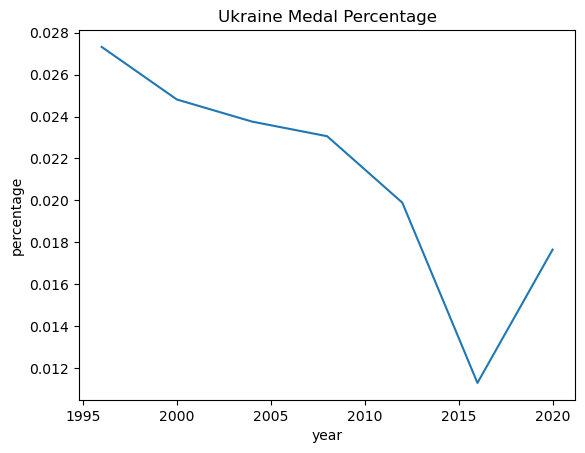

In [86]:
sns.lineplot(data=df_UKR, x="year", y = "percentage")
plt.title("Ukraine Medal Percentage")

In [87]:
df_CAN= df_temp2[df_temp2["country_3_letter_code"] == "CAN"]
df_CAN['year'] = df_CAN["slug_game"].str[-4:].astype(int)
df_CAN = df_CAN[df_CAN["year"] % 4 == 0]
df_CAN = df_CAN[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_CAN = df_CAN.reset_index()
df_CAN = pd.merge(df_CAN, df_temp4, on = ["slug_game", "year"], how = "inner")
df_CAN["percentage"] = df_CAN["medal_type"] / df_CAN["medal_count"]
df_CAN = df_CAN[~df_CAN['slug_game'].isin(cities_to_drop)]
df_CAN = df_CAN.sort_values(by = "year")
df_CAN.head()

/tmp/ipykernel_140/979095225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CAN['year'] = df_CAN["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
28,paris-1900,CAN,1900,2,277,0.007220
36,st-louis-1904,CAN,1904,6,280,0.021429
18,london-1908,CAN,1908,16,324,0.049383
39,stockholm-1912,CAN,1912,8,312,0.025641
2,antwerp-1920,CAN,1920,9,438,0.020548


Text(0.5, 1.0, 'Canada Medal Percentage')

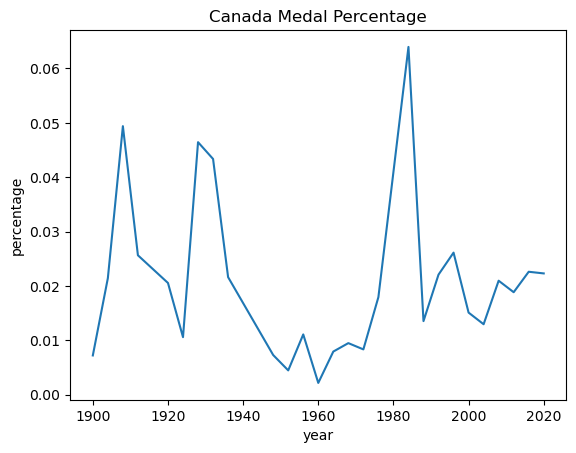

In [88]:
sns.lineplot(data=df_CAN, x="year", y = "percentage")
plt.title("Canada Medal Percentage")

In [89]:
df_NED= df_temp2[df_temp2["country_3_letter_code"] == "NED"]
df_NED['year'] = df_NED["slug_game"].str[-4:].astype(int)
df_NED = df_NED[df_NED["year"] % 4 == 0]
df_NED = df_NED[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_NED = df_NED.reset_index()
df_NED = pd.merge(df_NED, df_temp4, on = ["slug_game", "year"], how = "inner")
df_NED["percentage"] = df_NED["medal_type"] / df_NED["medal_count"]
df_NED = df_NED[~df_NED['slug_game'].isin(cities_to_drop)]
df_NED = df_NED.sort_values(by = "year")
df_NED.head()

/tmp/ipykernel_140/1343428108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NED['year'] = df_NED["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
24,paris-1900,NED,1900,5,277,0.018051
14,london-1908,NED,1908,2,324,0.006173
31,stockholm-1912,NED,1912,3,312,0.009615
2,antwerp-1920,NED,1920,11,438,0.025114
25,paris-1924,NED,1924,10,378,0.026455


Text(0.5, 1.0, 'Netherland Medal Percentage')

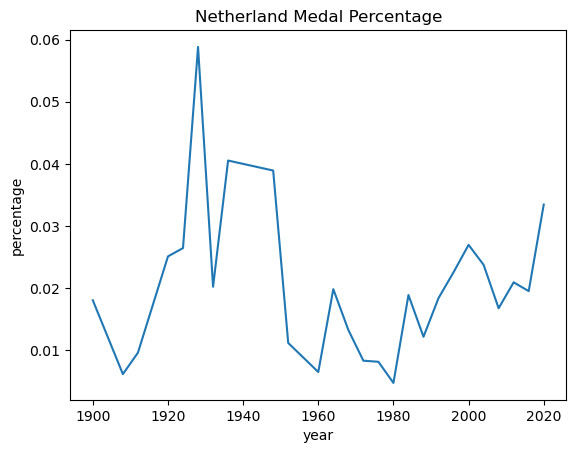

In [90]:
sns.lineplot(data=df_NED, x="year", y = "percentage")
plt.title("Netherland Medal Percentage")

In [91]:
df_SUI= df_temp2[df_temp2["country_3_letter_code"] == "SUI"]
df_SUI['year'] = df_SUI["slug_game"].str[-4:].astype(int)
df_SUI = df_SUI[df_SUI["year"] % 4 == 0]
df_SUI = df_SUI[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_SUI = df_SUI.reset_index()
df_SUI = pd.merge(df_SUI, df_temp4, on = ["slug_game", "year"], how = "inner")
df_SUI["percentage"] = df_SUI["medal_type"] / df_SUI["medal_count"]
df_SUI = df_SUI[~df_SUI['slug_game'].isin(cities_to_drop)]
df_SUI = df_SUI.sort_values(by = "year")
df_SUI.head()

/tmp/ipykernel_140/3054910575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SUI['year'] = df_SUI["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
3,athens-1896,SUI,1896,3,122,0.024590
27,paris-1900,SUI,1900,9,277,0.032491
35,st-louis-1904,SUI,1904,3,280,0.010714
2,antwerp-1920,SUI,1920,11,438,0.025114
28,paris-1924,SUI,1924,25,378,0.066138


Text(0.5, 1.0, 'Switzerland Medal Percentage')

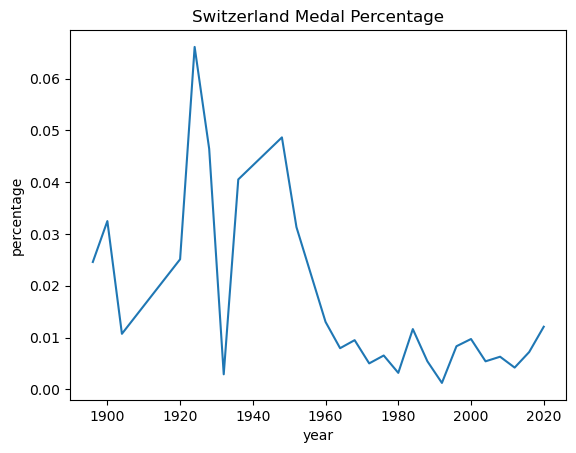

In [92]:
sns.lineplot(data=df_SUI, x="year", y = "percentage")
plt.title("Switzerland Medal Percentage")

In [93]:
df_GER= df_temp2[df_temp2["country_3_letter_code"] == "GER"]
df_GER['year'] = df_GER["slug_game"].str[-4:].astype(int)
df_GER = df_GER[df_GER["year"] % 4 == 0]
df_GER = df_GER[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_GER = df_GER.reset_index()
df_GER = pd.merge(df_GER, df_temp4, on = ["slug_game", "year"], how = "inner")
df_GER["percentage"] = df_GER["medal_type"] / df_GER["medal_count"]
df_GER = df_GER[~df_GER['slug_game'].isin(cities_to_drop)]
df_GER = df_GER.sort_values(by = "year")
df_GER.head()

/tmp/ipykernel_140/3168718878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GER['year'] = df_GER["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
2,athens-1896,GER,1896,13,122,0.106557
18,paris-1900,GER,1900,9,277,0.032491
22,st-louis-1904,GER,1904,15,280,0.053571
13,london-1908,GER,1908,13,324,0.040123
24,stockholm-1912,GER,1912,25,312,0.080128


Text(0.5, 1.0, 'Germany Medal Percentage')

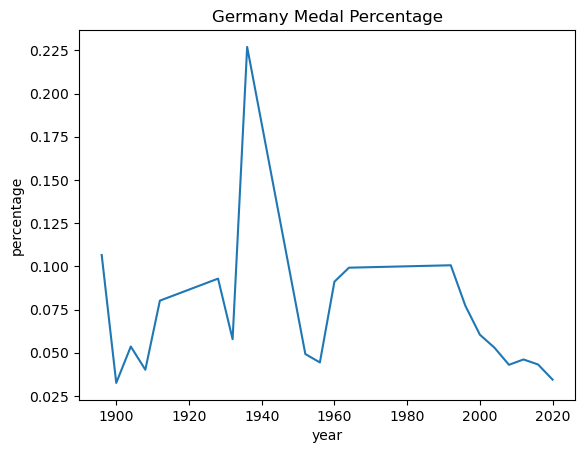

In [94]:
sns.lineplot(data=df_GER, x="year", y = "percentage")
plt.title("Germany Medal Percentage")

In [95]:
df_AUS= df_temp2[df_temp2["country_3_letter_code"] == "AUS"]
df_AUS['year'] = df_AUS["slug_game"].str[-4:].astype(int)
df_AUS = df_AUS[df_AUS["year"] % 4 == 0]
df_AUS = df_AUS[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_AUS = df_AUS.reset_index()
df_AUS = pd.merge(df_AUS, df_temp4, on = ["slug_game", "year"], how = "inner")
df_AUS["percentage"] = df_AUS["medal_type"] / df_AUS["medal_count"]
df_AUS = df_AUS[~df_AUS['slug_game'].isin(cities_to_drop)]
df_AUS = df_AUS.sort_values(by = "year")
df_AUS.head()

/tmp/ipykernel_140/985419254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AUS['year'] = df_AUS["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
2,athens-1896,AUS,1896,2,122,0.016393
18,paris-1900,AUS,1900,5,277,0.018051
23,st-louis-1904,AUS,1904,4,280,0.014286
1,antwerp-1920,AUS,1920,3,438,0.006849
19,paris-1924,AUS,1924,6,378,0.015873


Text(0.5, 1.0, 'Australia Medal Percentage')

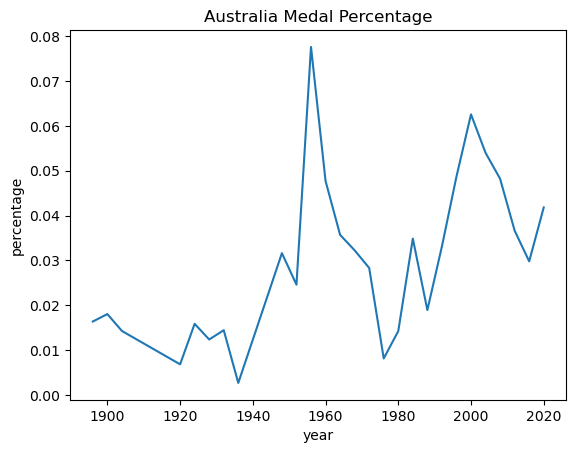

In [96]:
sns.lineplot(data=df_AUS, x="year", y = "percentage")
plt.title("Australia Medal Percentage")

In [97]:
df_ROU= df_temp2[df_temp2["country_3_letter_code"] == "ROU"]
df_ROU['year'] = df_ROU["slug_game"].str[-4:].astype(int)
df_ROU = df_ROU[df_ROU["year"] % 4 == 0]
df_ROU = df_ROU[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_ROU = df_ROU.reset_index()
df_ROU = pd.merge(df_ROU, df_temp4, on = ["slug_game", "year"], how = "inner")
df_ROU["percentage"] = df_ROU["medal_type"] / df_ROU["medal_count"]
df_ROU = df_ROU[~df_ROU['slug_game'].isin(cities_to_drop)]
df_ROU = df_ROU.sort_values(by = "year")
df_ROU.head()

/tmp/ipykernel_140/703989369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROU['year'] = df_ROU["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
14,paris-1924,ROU,1924,1,378,0.002646
4,berlin-1936,ROU,1936,1,370,0.002703
6,helsinki-1952,ROU,1952,4,447,0.008949
9,melbourne-1956,ROU,1956,13,451,0.028825
16,rome-1960,ROU,1960,10,461,0.021692


Text(0.5, 1.0, 'Romania Medal Percentage')

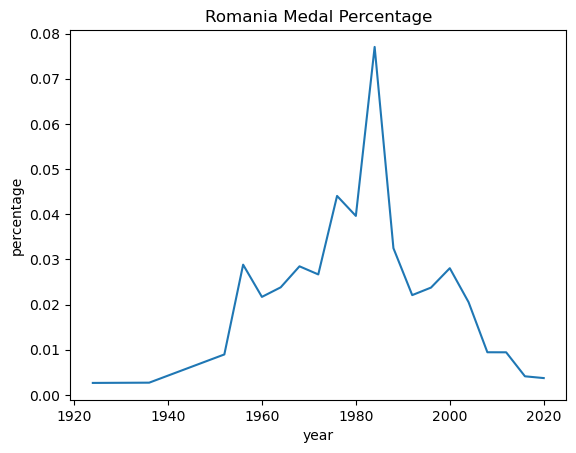

In [98]:
sns.lineplot(data=df_ROU, x="year", y = "percentage")
plt.title("Romania Medal Percentage")

In [99]:
df_KOR= df_temp2[df_temp2["country_3_letter_code"] == "KOR"]
df_KOR['year'] = df_KOR["slug_game"].str[-4:].astype(int)
df_KOR = df_KOR[df_KOR["year"] % 4 == 0]
df_KOR = df_KOR[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_KOR = df_KOR.reset_index()
df_KOR = pd.merge(df_KOR, df_temp4, on = ["slug_game", "year"], how = "inner")
df_KOR["percentage"] = df_KOR["medal_type"] / df_KOR["medal_count"]
df_KOR = df_KOR[~df_KOR['slug_game'].isin(cities_to_drop)]
df_KOR = df_KOR.sort_values(by = "year")
df_KOR.head()

/tmp/ipykernel_140/2357187067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KOR['year'] = df_KOR["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
6,london-1948,KOR,1948,2,411,0.004866
5,helsinki-1952,KOR,1952,2,447,0.004474
9,melbourne-1956,KOR,1956,2,451,0.004435
16,tokyo-1964,KOR,1964,3,504,0.005952
10,mexico-city-1968,KOR,1968,2,527,0.003795


Text(0.5, 1.0, 'Korea Medal Percentage')

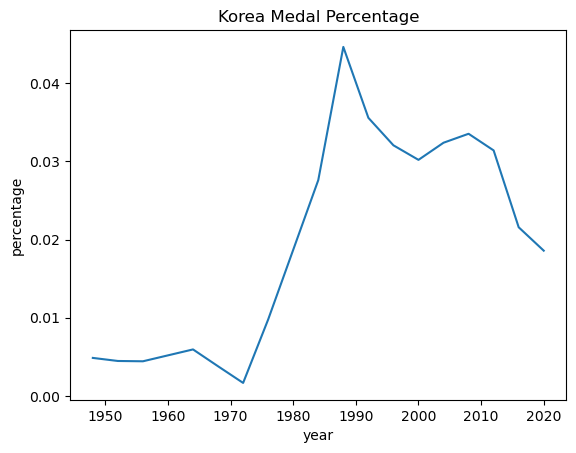

In [100]:
sns.lineplot(data=df_KOR, x="year", y = "percentage")
plt.title("Korea Medal Percentage")

In [101]:
df_TUR= df_temp2[df_temp2["country_3_letter_code"] == "TUR"]
df_TUR['year'] = df_TUR["slug_game"].str[-4:].astype(int)
df_TUR = df_TUR[df_TUR["year"] % 4 == 0]
df_TUR = df_TUR[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_TUR = df_TUR.reset_index()
df_TUR = pd.merge(df_TUR, df_temp4, on = ["slug_game", "year"], how = "inner")
df_TUR["percentage"] = df_TUR["medal_type"] / df_TUR["medal_count"]
df_TUR = df_TUR[~df_TUR['slug_game'].isin(cities_to_drop)]
df_TUR = df_TUR.sort_values(by = "year")
df_TUR.head()

/tmp/ipykernel_140/240556116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TUR['year'] = df_TUR["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,berlin-1936,TUR,1936,2,370,0.005405
6,london-1948,TUR,1948,12,411,0.029197
5,helsinki-1952,TUR,1952,3,447,0.006711
9,melbourne-1956,TUR,1956,7,451,0.015521
13,rome-1960,TUR,1960,9,461,0.019523


Text(0.5, 1.0, 'Turkey Medal Percentage')

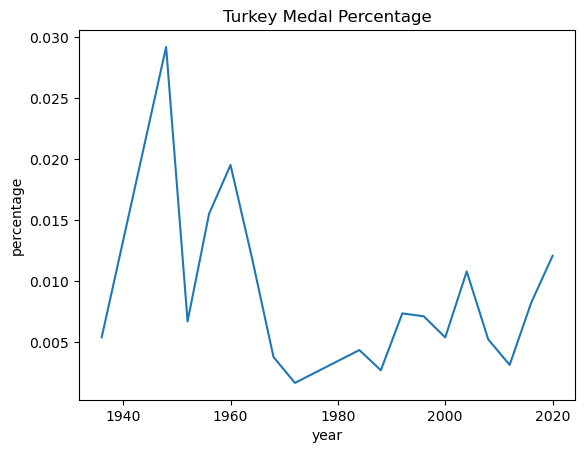

In [102]:
sns.lineplot(data=df_TUR, x="year", y = "percentage")
plt.title("Turkey Medal Percentage")

In [103]:
df_ESP= df_temp2[df_temp2["country_3_letter_code"] == "ESP"]
df_ESP['year'] = df_ESP["slug_game"].str[-4:].astype(int)
df_ESP = df_ESP[df_ESP["year"] % 4 == 0]
df_ESP = df_ESP[["slug_game", "medal_type", "country_3_letter_code", "year"]].groupby(by = ["slug_game", "country_3_letter_code", "year"]).agg("count")
df_ESP = df_ESP.reset_index()
df_ESP = pd.merge(df_ESP, df_temp4, on = ["slug_game", "year"], how = "inner")
df_ESP["percentage"] = df_ESP["medal_type"] / df_ESP["medal_count"]
df_ESP = df_ESP[~df_ESP['slug_game'].isin(cities_to_drop)]
df_ESP = df_ESP.sort_values(by = "year")
df_ESP.head()

/tmp/ipykernel_140/580319250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ESP['year'] = df_ESP["slug_game"].str[-4:].astype(int)


,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
15,paris-1900,ESP,1900,1,277,0.003610
2,antwerp-1920,ESP,1920,2,438,0.004566
1,amsterdam-1928,ESP,1928,1,323,0.003096
10,los-angeles-1932,ESP,1932,1,346,0.002890
8,london-1948,ESP,1948,1,411,0.002433


Text(0.5, 1.0, 'Spain Medal Percentage')

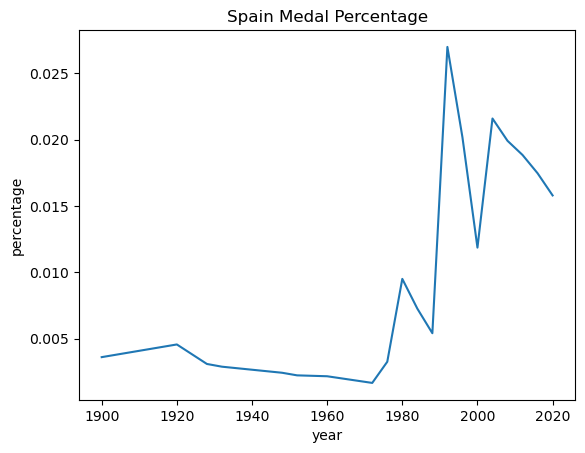

In [104]:
sns.lineplot(data=df_ESP, x="year", y = "percentage")
plt.title("Spain Medal Percentage")

To keep consistency, we will take years from 1996 onwards for all participating countries

In [105]:
df_USA1 = df_USA[df_USA["year"] >= 1996]
df_GBR1 = df_GBR[df_GBR["year"] >= 1996]
df_JPN1 = df_JPN[df_JPN["year"] >= 1996]
df_CHN1 = df_CHN[df_CHN["year"] >= 1996]
df_ITA1 = df_ITA[df_ITA["year"] >= 1996]
df_FRA1 = df_FRA[df_FRA["year"] >= 1996]
df_BRA1 = df_BRA[df_BRA["year"] >= 1996]
df_UKR1 = df_UKR[df_UKR["year"] >= 1996]
df_CAN1 = df_CAN[df_CAN["year"] >= 1996]
df_NED1 = df_NED[df_NED["year"] >= 1996]
df_SUI1 = df_SUI[df_SUI["year"] >= 1996]
df_ESP1 = df_ESP[df_ESP["year"] >= 1996]
df_GER1 = df_GER[df_GER["year"] >= 1996]
df_AUS1 = df_AUS[df_AUS["year"] >= 1996]
df_ROU1 = df_ROU[df_ROU["year"] >= 1996]
df_KOR1 = df_KOR[df_KOR["year"] >= 1996]
df_TUR1 = df_TUR[df_TUR["year"] >= 1996]

In [106]:
df_USA1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
5,atlanta-1996,USA,1996,101,842,0.119952
41,sydney-2000,USA,2000,93,927,0.100324
4,athens-2004,USA,2004,101,926,0.109071
7,beijing-2008,USA,2008,112,954,0.117400
21,london-2012,USA,2012,104,955,0.108901
31,rio-2016,USA,2016,121,973,0.124358
43,tokyo-2020,USA,2020,113,1076,0.105019


In [107]:
df_GBR1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,atlanta-1996,GBR,1996,15,842,0.017815
35,sydney-2000,GBR,2000,28,927,0.030205
3,athens-2004,GBR,2004,30,926,0.032397
6,beijing-2008,GBR,2008,51,954,0.053459
16,london-2012,GBR,2012,65,955,0.068063
27,rio-2016,GBR,2016,67,973,0.068859
37,tokyo-2020,GBR,2020,65,1076,0.060409


In [108]:
df_JPN1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,atlanta-1996,JPN,1996,14,842,0.016627
25,sydney-2000,JPN,2000,18,927,0.019417
3,athens-2004,JPN,2004,37,926,0.039957
6,beijing-2008,JPN,2008,25,954,0.026205
12,london-2012,JPN,2012,38,955,0.039791
20,rio-2016,JPN,2016,41,973,0.042138
27,tokyo-2020,JPN,2020,57,1076,0.052974


In [109]:
df_CHN1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
2,atlanta-1996,CHN,1996,50,842,0.059382
9,sydney-2000,CHN,2000,58,927,0.062567
1,athens-2004,CHN,2004,63,926,0.068035
4,beijing-2008,CHN,2008,100,954,0.104822
5,london-2012,CHN,2012,91,955,0.095288
7,rio-2016,CHN,2016,70,973,0.071942
10,tokyo-2020,CHN,2020,88,1076,0.081784


In [110]:
df_ITA1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,atlanta-1996,ITA,1996,35,842,0.041568
36,sydney-2000,ITA,2000,34,927,0.036677
3,athens-2004,ITA,2004,32,926,0.034557
6,beijing-2008,ITA,2008,27,954,0.028302
17,london-2012,ITA,2012,28,955,0.029319
28,rio-2016,ITA,2016,28,973,0.028777
38,tokyo-2020,ITA,2020,40,1076,0.037175


In [111]:
df_FRA1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
5,atlanta-1996,FRA,1996,37,842,0.043943
41,sydney-2000,FRA,2000,38,927,0.040992
4,athens-2004,FRA,2004,33,926,0.035637
7,beijing-2008,FRA,2008,41,954,0.042977
20,london-2012,FRA,2012,35,955,0.036649
31,rio-2016,FRA,2016,42,973,0.043165
43,tokyo-2020,FRA,2020,33,1076,0.030669


In [112]:
df_BRA1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
2,atlanta-1996,BRA,1996,15,842,0.017815
17,sydney-2000,BRA,2000,12,927,0.012945
1,athens-2004,BRA,2004,10,926,0.010799
4,beijing-2008,BRA,2008,17,954,0.017820
7,london-2012,BRA,2012,17,955,0.017801
14,rio-2016,BRA,2016,19,973,0.019527
19,tokyo-2020,BRA,2020,20,1076,0.018587


In [113]:
df_UKR1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
1,atlanta-1996,UKR,1996,23,842,0.027316
5,sydney-2000,UKR,2000,23,927,0.024811
0,athens-2004,UKR,2004,22,926,0.023758
2,beijing-2008,UKR,2008,22,954,0.023061
3,london-2012,UKR,2012,19,955,0.019895
4,rio-2016,UKR,2016,11,973,0.011305
6,tokyo-2020,UKR,2020,19,1076,0.017658


In [114]:
df_CAN1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,atlanta-1996,CAN,1996,22,842,0.026128
40,sydney-2000,CAN,2000,14,927,0.015102
3,athens-2004,CAN,2004,12,926,0.012959
6,beijing-2008,CAN,2008,20,954,0.020964
20,london-2012,CAN,2012,18,955,0.018848
30,rio-2016,CAN,2016,22,973,0.022610
42,tokyo-2020,CAN,2020,24,1076,0.022305


In [115]:
df_NED1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,atlanta-1996,NED,1996,19,842,0.022565
32,sydney-2000,NED,2000,25,927,0.026969
3,athens-2004,NED,2004,22,926,0.023758
6,beijing-2008,NED,2008,16,954,0.016771
16,london-2012,NED,2012,20,955,0.020942
26,rio-2016,NED,2016,19,973,0.019527
34,tokyo-2020,NED,2020,36,1076,0.033457


In [116]:
df_SUI1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
5,atlanta-1996,SUI,1996,7,842,0.008314
38,sydney-2000,SUI,2000,9,927,0.009709
4,athens-2004,SUI,2004,5,926,0.005400
7,beijing-2008,SUI,2008,6,954,0.006289
19,london-2012,SUI,2012,4,955,0.004188
29,rio-2016,SUI,2016,7,973,0.007194
40,tokyo-2020,SUI,2020,13,1076,0.012082


In [117]:
df_ESP1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,atlanta-1996,ESP,1996,17,842,0.020190
20,sydney-2000,ESP,2000,11,927,0.011866
3,athens-2004,ESP,2004,20,926,0.021598
6,beijing-2008,ESP,2008,19,954,0.019916
9,london-2012,ESP,2012,18,955,0.018848
16,rio-2016,ESP,2016,17,973,0.017472
21,tokyo-2020,ESP,2020,17,1076,0.015799


In [118]:
df_GER1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,atlanta-1996,GER,1996,65,842,0.077197
25,sydney-2000,GER,2000,56,927,0.060410
3,athens-2004,GER,2004,49,926,0.052916
6,beijing-2008,GER,2008,41,954,0.042977
14,london-2012,GER,2012,44,955,0.046073
19,rio-2016,GER,2016,42,973,0.043165
27,tokyo-2020,GER,2020,37,1076,0.034387


In [119]:
df_AUS1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
4,atlanta-1996,AUS,1996,41,842,0.048694
24,sydney-2000,AUS,2000,58,927,0.062567
3,athens-2004,AUS,2004,50,926,0.053996
6,beijing-2008,AUS,2008,46,954,0.048218
10,london-2012,AUS,2012,35,955,0.036649
20,rio-2016,AUS,2016,29,973,0.029805
26,tokyo-2020,AUS,2020,45,1076,0.041822


In [120]:
df_ROU1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
1,atlanta-1996,ROU,1996,20,842,0.023753
18,sydney-2000,ROU,2000,26,927,0.028047
0,athens-2004,ROU,2004,19,926,0.020518
3,beijing-2008,ROU,2008,9,954,0.009434
7,london-2012,ROU,2012,9,955,0.009424
15,rio-2016,ROU,2016,4,973,0.004111
20,tokyo-2020,ROU,2020,4,1076,0.003717


In [121]:
df_KOR1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
2,atlanta-1996,KOR,1996,27,842,0.032067
15,sydney-2000,KOR,2000,28,927,0.030205
1,athens-2004,KOR,2004,30,926,0.032397
4,beijing-2008,KOR,2008,32,954,0.033543
7,london-2012,KOR,2012,30,955,0.031414
13,rio-2016,KOR,2016,21,973,0.021583
17,tokyo-2020,KOR,2020,20,1076,0.018587


In [122]:
df_TUR1

,slug_game,country_3_letter_code,year,medal_type,medal_count,percentage
1,atlanta-1996,TUR,1996,6,842,0.007126
15,sydney-2000,TUR,2000,5,927,0.005394
0,athens-2004,TUR,2004,10,926,0.010799
3,beijing-2008,TUR,2008,5,954,0.005241
7,london-2012,TUR,2012,3,955,0.003141
12,rio-2016,TUR,2016,8,973,0.008222
17,tokyo-2020,TUR,2020,13,1076,0.012082


Finally, take an 80% confidence interval of medal count proportion

In [123]:
# np.random.seed(42)

# # Function to calculate the statistic of interest (in this case, the mean)
# def statistic(data):
#     return np.mean(data)

# # Bootstrap function to resample the data and calculate the statistic
# def bootstrap(data, statistic, num_samples):
#     n = len(data)
#     bootstrap_samples = np.random.choice(data, size=(num_samples, n), replace=True)
#     statistics = np.apply_along_axis(statistic, axis=1, arr=bootstrap_samples)
#     return statistics

In [124]:
# # Extract the column data from the DataFrame
# data = df_USA1['percentage']

# # Calculate bootstrap samples
# bootstrap_samples = bootstrap(data, statistic, num_samples=1000)

# # Calculate the confidence interval
# alpha = 0.2  # 1 - confidence level
# lower_bound = np.percentile(bootstrap_samples, 100 * (alpha / 2))
# upper_bound = np.percentile(bootstrap_samples, 100 * (1 - alpha / 2))

# print(f"USA 80% Confidence Interval: [{lower_bound}, {upper_bound}]")

In [125]:
def statistic(data):
    return np.mean(data)

def bootstrap(data, statistic, num_samples):
    n = len(data)
    bootstrap_samples = np.random.choice(data, size=(num_samples, n), replace=True)
    statistics = np.apply_along_axis(statistic, axis=1, arr=bootstrap_samples)
    return statistics

def bootstrap_dataframe(df, column_name, num_samples=1000):
    data = df[column_name]

    bootstrap_samples = bootstrap(data, statistic, num_samples)

    alpha = 0.2  # 1 - confidence level
    lower_bound = np.percentile(bootstrap_samples, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_samples, 100 * (1 - alpha / 2))

    return lower_bound, upper_bound


dataframes_list = [df_USA1, df_GBR1, df_JPN1, df_CHN1, df_ITA1, df_FRA1, df_BRA1, df_UKR1, df_CAN1, df_NED1, df_SUI1, df_ESP1, df_GER1, df_AUS1, df_ROU1, df_KOR1, df_TUR1]  # List of your DataFrames

for idx, df in enumerate(dataframes_list):
    lower_bound, upper_bound = bootstrap_dataframe(df, 'percentage')
    print(f"DataFrame {idx+1}: 80% Confidence Interval: [{lower_bound}, {upper_bound}]")

DataFrame 1: 80% Confidence Interval: [0.1081577724210285, 0.11592072945801439]
DataFrame 2: 80% Confidence Interval: [0.038266793183764324, 0.056607998630075006]
DataFrame 3: 80% Confidence Interval: [0.027691014159189425, 0.04009223971857796]
DataFrame 4: 80% Confidence Interval: [0.07023605497703486, 0.08528727638624375]
DataFrame 5: 80% Confidence Interval: [0.03162633267654347, 0.03603698968814666]
DataFrame 6: 80% Confidence Interval: [0.03693217184026262, 0.04130305468202062]
DataFrame 7: 80% Confidence Interval: [0.014835843114561558, 0.01785376400413748]
DataFrame 8: 80% Confidence Interval: [0.018576285649779114, 0.02334902201864499]
DataFrame 9: 80% Confidence Interval: [0.017964035938562117, 0.021923645372913775]
DataFrame 10: 80% Confidence Interval: [0.021011622071919252, 0.026062361375943123]
DataFrame 11: 80% Confidence Interval: [0.00636790207244427, 0.008840301614545598]
DataFrame 12: 80% Confidence Interval: [0.016603831975206332, 0.019487624184399973]
DataFrame 13: 